In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np

In [4]:
#Import datasheet
df = pd.read_csv('https://raw.githubusercontent.com/Sumi2089/Datasheet/main/load_data.csv')
df.head()

,Year,Month,Day,Hour,Demand
0,2015,1,31,1,954.2018
1,2015,1,31,2,913.8660
2,2015,1,31,3,903.3637
3,2015,1,31,4,889.0806
4,2015,1,31,5,910.1472


In [5]:
print(df.dtypes)

Year        int64
Month       int64
Day         int64
Hour        int64
Demand    float64
dtype: object


In [6]:
#Transform the Data
#Into array
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
y = []

#Append each of the values into this empty list
for i in range(0, df.shape[0]-24):
    X0.append(df.iloc[i:i+24, 0])
    X1.append(df.iloc[i:i+24, 1])
    X2.append(df.iloc[i:i+24, 2])
    X3.append(df.iloc[i:i+24, 3])
    X4.append(df.iloc[i:i+24, 4])
    y.append(df.iloc[i+24, 4])

X0, X1, X2, X3, X4, y = np.array(X0), np.array(X1), np.array(X2), np.array(X3), np.array(X4), np.array(y)
y.shape

(36696,)

In [7]:
y = np.reshape(y, (len(y),1))
y.shape

(36696, 1)

In [8]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X0 = scaler.fit_transform(X0)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
X4 = scaler.fit_transform(X4)
y = scaler.fit_transform(y)
X4


array([[0.53187781, 0.50719025, 0.50076231, ..., 0.58505357, 0.5529143 ,
        0.52289706],
       [0.50719025, 0.50076231, 0.49202033, ..., 0.5529143 , 0.52289706,
        0.50137895],
       [0.50076231, 0.49202033, 0.50491416, ..., 0.52289706, 0.50137895,
        0.48887696],
       ...,
       [0.75495489, 0.7130856 , 0.66484278, ..., 0.81263896, 0.80324704,
        0.77443812],
       [0.7130856 , 0.66484278, 0.63206097, ..., 0.80324704, 0.77443812,
        0.74890715],
       [0.66484278, 0.63206097, 0.61135896, ..., 0.77443812, 0.74890715,
        0.70218112]])

In [9]:

X = np.stack([X0, X1, X2, X3, X4], axis=2)
X.shape

(36696, 24, 5)

In [11]:
#Train set and test set
X_train, X_test = X[ :-720], X[-720: ]
y_train, y_test = y[ :-720], y[-720: ]
X_train.shape[1], X_train.shape[2]

(24, 5)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Dropout
from tensorflow.keras import optimizers

input_shape=([X_train.shape[1], X_train.shape[2]])

In [40]:
def create_lstm_model(input_shape):
  model = Sequential()
  model.add(LSTM(100, return_sequences=False, input_shape=input_shape)) # Removed extra indentation
  model.add(Dropout(0.2))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))


  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  return model

In [41]:
def create_gru_model(input_shape):
  model = Sequential()
  model.add(GRU(100, return_sequences=False, input_shape=input_shape)) # Removed extra indentation
  model.add(Dropout(0.2))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))


  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  return model

In [122]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Define CNN-LSTM model
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, input_shape=input_shape)) # Removed return_sequences argument
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model # Added return statement

In [123]:
# Define models
SEQ_LENGTH = 24
COLOUM_NUMBER = 5
lstm_model = create_lstm_model((SEQ_LENGTH, COLOUM_NUMBER))
gru_model = create_gru_model((SEQ_LENGTH, COLOUM_NUMBER))
cnn_lstm_model = create_cnn_lstm_model((SEQ_LENGTH, COLOUM_NUMBER))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
#Training the model
lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=16)
gru_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=16)
cnn_lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=16)


Epoch 1/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 0.0157 - mae: 0.0886 - val_loss: 0.0022 - val_mae: 0.0393
Epoch 2/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 0.0029 - mae: 0.0417 - val_loss: 7.5271e-04 - val_mae: 0.0189
Epoch 3/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - loss: 0.0014 - mae: 0.0279 - val_loss: 4.7091e-04 - val_mae: 0.0149
Epoch 4/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 8.6714e-04 - mae: 0.0223 - val_loss: 4.6937e-04 - val_mae: 0.0162
Epoch 5/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 6.8728e-04 - mae: 0.0201 - val_loss: 4.1998e-04 - val_mae: 0.0157
Epoch 1/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - loss: 0.0133 - mae: 0.0830 - val_loss: 0.0014 - val_mae: 0.0285
Epoch 2/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 6.7214e-04 - val_mae: 0.0199
Epoch 3/5
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0011 - mae: 0.0253 - val_loss: 4.5839e-04 - val_mae: 0.0152


In [125]:
from sklearn.svm import SVR

# Flatten the input for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_flat, y_train.ravel())
#SVM predictions
svm_predictions = svm_model.predict(X_test_flat)

In [127]:
#Evaluate and prediction
'''MSE, MAE = lstm_model.evaluate(X_test, y_test)
MSE, MAE = gru_model.evaluate(X_test, y_test)
print(MSE, MAE)'''

#Make predictions
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
cnn_lstm_predictions = cnn_lstm_model.predict(X_test)


#Inverse transform predictions
y_test_inverse = scaler.inverse_transform(y_test)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)
cnn_lstm_predictions_inverse = scaler.inverse_transform(cnn_lstm_predictions) #Ensure this line is present and executed
svm_predictions_inverse = scaler.inverse_transform(svm_predictions.reshape(-1, 1))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [128]:
# Calculate errors
from sklearn.metrics import mean_squared_error
lstm_error = mean_squared_error(y_test_inverse, lstm_predictions_inverse)
gru_error = mean_squared_error(y_test_inverse, gru_predictions_inverse)
cnn_lstm_error = mean_squared_error(y_test_inverse, cnn_lstm_predictions_inverse)
svm_error = mean_squared_error(y_test_inverse, svm_predictions_inverse)

print(f'LSTM MSE: {lstm_error}')
print(f'GRU MSE: {gru_error}')
print(f'CNN-LSTM MSE: {cnn_lstm_error}')
print(f'SVM MSE: {svm_error}')

LSTM MSE: 1115.9274892007186
GRU MSE: 1119.8051095385836
CNN-LSTM MSE: 6118.886815939883
SVM MSE: 8407.717460945269


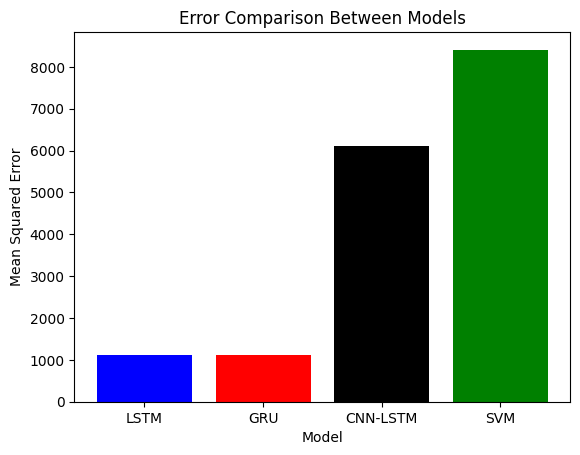

In [131]:
# Plot errors
import matplotlib.pyplot as plt
models = ['LSTM', 'GRU', 'CNN-LSTM', 'SVM'] # Added 'SVM' to the list
errors = [lstm_error, gru_error, cnn_lstm_error, svm_error]

plt.bar(models, errors, color=['blue', 'red', 'black', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Error Comparison Between Models')
plt.show()

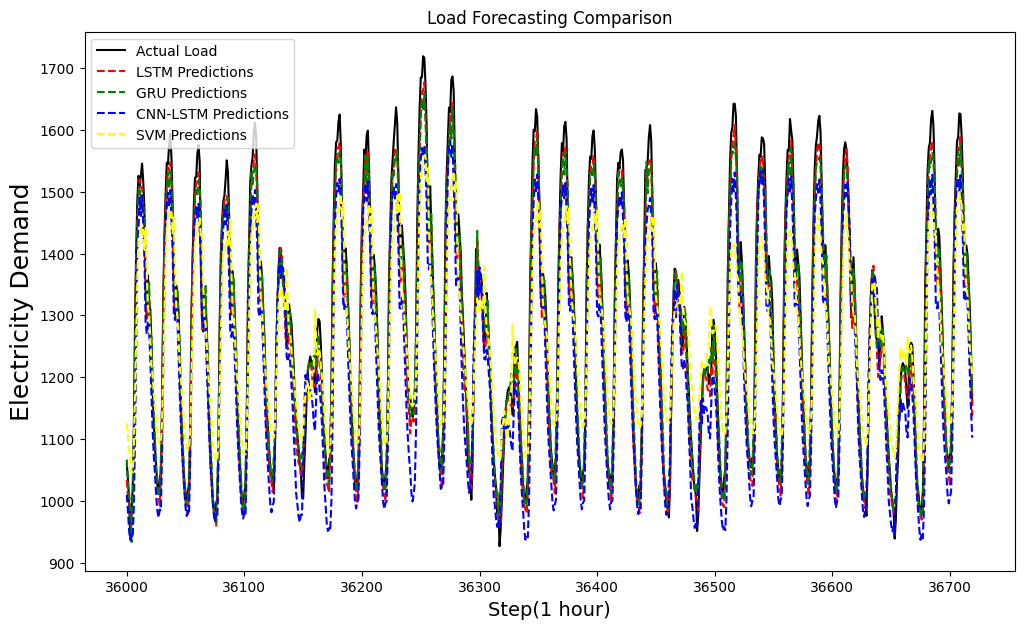

In [133]:
# Plot predictions
data = df
plt.figure(figsize=(12, 7))
plt.plot(data.index[-len(y_test):], y_test_inverse, color='black', label='Actual Load')
plt.plot(data.index[-len(lstm_predictions_inverse):], lstm_predictions_inverse, color='red', linestyle='--', label='LSTM Predictions')
plt.plot(data.index[-len(gru_predictions_inverse):], gru_predictions_inverse, color='green', linestyle='--', label='GRU Predictions')
plt.plot(data.index[-len(cnn_lstm_predictions_inverse):], cnn_lstm_predictions_inverse, color='blue', linestyle='--', label='CNN-LSTM Predictions')
plt.plot(data.index[-len(svm_predictions_inverse):], svm_predictions_inverse, color='yellow', linestyle='--', label='SVM Predictions')

plt.xlabel('Step(1 hour)', fontsize=14)
plt.ylabel('Electricity Demand', fontsize=18)
plt.title('Load Forecasting Comparison')
plt.legend()
plt.show()